# Ford GoBike Dataset
## by Ahmed Maged Mohammed

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#structure">The Structure of the Dataset</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#qanda">Asking Questions</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

## Introduction <a id='intro'></a>

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## The Structure of the Dataset <a id='structure'></a>

In [3]:
print("The Number of Rows is {} and the Number of Columns is {}".format(df.shape[0],df.shape[1]))

The Number of Rows is 183412 and the Number of Columns is 16


In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Checking if the station id count matches with the station names so we can drop one of the two columns
df.start_station_id.value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [7]:
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

> It seams that the id of the station count matches with the station name perfectly so we can drop one of the columns, and we will do the same with end stations

In [8]:
df.bike_id.value_counts() #to know the number of bikes in the system

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
2297      1
2258      1
2415      1
1397      1
5067      1
Name: bike_id, Length: 4646, dtype: int64

It seams that we have 4646 bikes in the system.

In [9]:
df.user_type.value_counts() #to count the types and number of users

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

It seams we have two types of users Subscribers (163544) and Customers(19868)

In [10]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

### To Sum Up
#### The Dataset Contains 183412 Rows and  16 Columns , the columns are:

>**duration_sec** :             The trip duration in seconds<br>
>**start_time** :               The start date and time of the trip<br>
>**end_time** :                 The finishing date and time of the trip<br>
>**start_station_id** :         A unique id given to each start station <br>
>**start_station_name** :       The name of the start station <br>
>**start_station_latitude** :   The latitude coordinates of the start station<br>
>**start_station_longitude** :  The longitude coordinates of the start station<br>
>**end_station_id** :           A unique id given to each end station<br>
>**end_station_name** :         The name of the end station<br>
>**end_station_latitude** :     The latitude coordinates of the end station<br>
>**end_station_longitude** :    The longitude coordinates of the end station <br>
>**bike_id** :                  The unique id of the bike (4646 bikes in total) <br>
>**user_type** :                Either Customers or Subscribers<br>
>**member_birth_year** :        The birth year of the member <br>
>**member_gender** :            The gender of the member (Male, Female or Other)<br>
>**bike_share_for_all_trip** :  Did the user make the whole trip using bike share <br>

#### From this initial overview i would modify the start and end time of the trips into an appropriate format ,drop the station id columns, station coordinates, and bike id. 
#### The main features i would concentrate on are the user gender, age, type, the most frequented stations (start and stop).
#### I would also ask the following questions:
>**Q1** Does the frequency of trips depend on if a user is a Male, Female or Other?<br>
>**Q2** How long does the average trip take?<br>
>**Q3** Does the frequency of trips depend on the age of the user?<br>
>**Q4** Does the frequency of trips depend on if a user is a subscriber or customer?<br>
>**Q5** Does the Duration of a ride depend on the Age of the User?<br>
>**Q6** How many users choose to use Bike Share for all Trip?<br>
>**Q7** what is the relation between the Gender of the user and their age?<br>
>**Q8** What are the top ten start and end stations?<br>
>**Q9** The Relation between gender, age and duration of trip.<br>

## Exploratory Data Analysis <a id='eda'></a>

In [11]:
#I will drop these columns from the dataset
columns = ['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id']
df.drop(labels=columns,axis=1,inplace=True)

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183215 non-null  object 
 4   end_station_name         183215 non-null  object 
 5   user_type                183412 non-null  object 
 6   member_birth_year        175147 non-null  float64
 7   member_gender            175147 non-null  object 
 8   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 12.6+ MB


In [14]:
df.describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [15]:
print("The Number of Rows is {} and the Number of Columns is {}".format(df.shape[0],df.shape[1]))

The Number of Rows is 183412 and the Number of Columns is 9


In [16]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name          197
end_station_name            197
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

>It seams we have several null values in the start, end stations, the gender, and birth year so i'm going to go ahead and drop those. 

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum() #to check that no null values remain.

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## Asking Questions <a id='qanda'></a>

### **Q1** Does the frequency of trips depend on if a user is a Male, Female or Other?

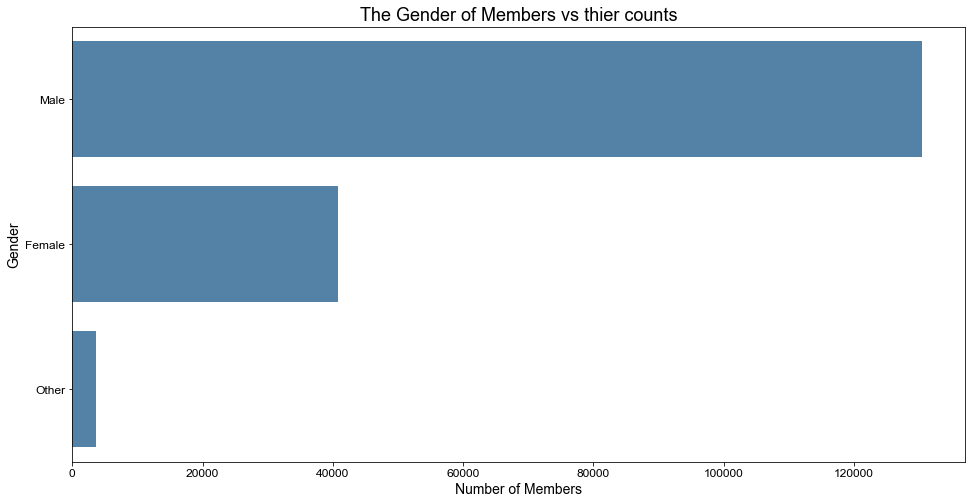

In [19]:
freq = df.member_gender.value_counts()
plt.figure(figsize = [16, 8])
sb.countplot(data=df,y='member_gender',color='steelblue',order=freq.index);
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Gender',fontsize=14);
plt.xlabel('Number of Members',fontsize=14);
plt.title("The Gender of Members vs thier counts",fontsize=18);

> From this first plot we can see that Males in general use the Ford GoBike service approximately 3 times as Females and orders of magnitudes more than Other, the marketing department should focus more on Females to increase their numbers.

### **Q2** How long does the average trip take?

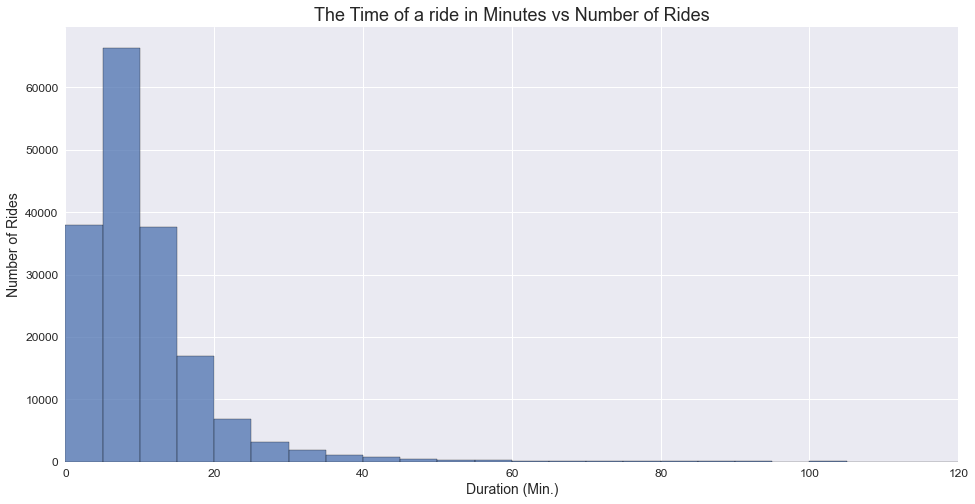

In [20]:
plt.figure(figsize = [16, 8])
bins = np.arange(0, (df['duration_sec']/60).max() + 5, 5) #calculated the ride in minutes instead of seconds for clarity 
sb.histplot(df['duration_sec']/60,bins =bins);
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlim(0,120);
plt.ylabel('Number of Rides',fontsize=14);
plt.xlabel('Duration (Min.)',fontsize=14);
plt.title("The Time of a ride in Minutes vs Number of Rides",fontsize=18);

>From this graph we can see that the average ride time is around 5 to 10 minutes which means that the majority of users approximately 65000 take 5 to 10 min trips while a smaller number of users (approx. 39000) take the bikes for 5 minutes and a simillar number take the bike for more than 10 minutes, and a minority of users take the bikes for more than an hour.

### **Q3** Does the frequency of trips depend on the age of the user?

In [21]:
df['member_age'] = 2021 - df['member_birth_year'] #TO calculate the age of the members
df.member_age.describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

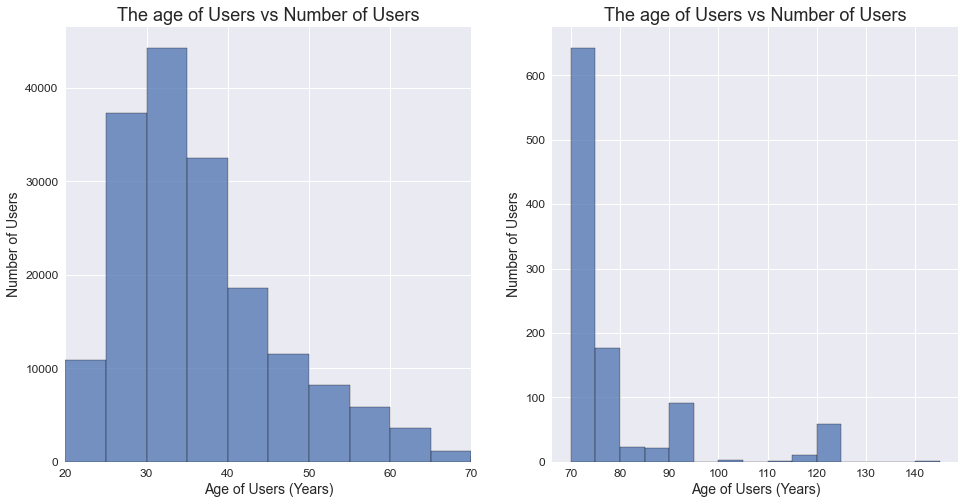

In [22]:
plt.figure(figsize = [16, 8])
plt.subplot(1,2,1)
bins = np.arange(20, (df['member_age']).max() + 5, 5) 
sb.histplot(df['member_age'],bins =bins);
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlim(20,70);
plt.ylabel('Number of Users',fontsize=14);
plt.xlabel('Age of Users (Years)',fontsize=14);
plt.title("The age of Users vs Number of Users",fontsize=18);
plt.subplot(1,2,2)
bins = np.arange(70, (df['member_age']).max() + 5, 5) 
sb.histplot(df['member_age'],bins =bins);
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Number of Users',fontsize=14);
plt.xlabel('Age of Users (Years)',fontsize=14);
plt.title("The age of Users vs Number of Users",fontsize=18);

> From the graph we can observe that most of the users are between the age of 25 to 40 and decreasing after 40 till we reach a few users by the age of 80.

### **Q4** Does the frequency of trips depend on if a user is a subscriber or customer?

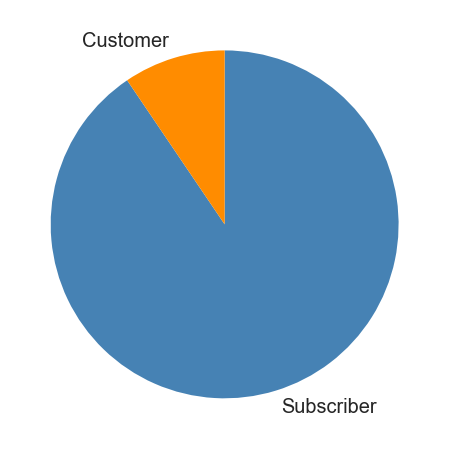

In [23]:
plt.figure(figsize = [16, 8])
countsub = df['user_type'].value_counts()
plt.pie(countsub, labels = [str(x) for x in countsub.index], startangle = 90, counterclock = False,textprops={'fontsize': 20},colors=['steelblue','darkorange']);
sb.histplot(df['member_age'],bins =bins);
plt.style.use('seaborn');

> From this graph we can see that the number of Subscribers surpass the number of Customers, and that Customers form about 1/8 from the users of the Ford GoBike service.

### **Q5** Does the Duration of a ride depend on the Age of the User?

In [24]:
df['duration_min'] = df['duration_sec']/60

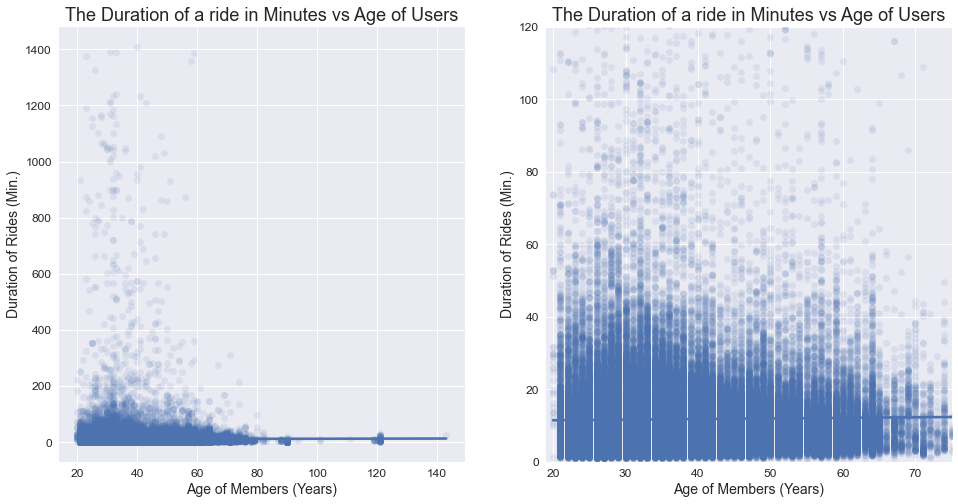

In [25]:
plt.figure(figsize = [16, 8])
plt.subplot(1,2,1)
sb.regplot(data =df, x='member_age',y=df['duration_min'],scatter_kws={'alpha':1/10});
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Duration of Rides (Min.)',fontsize=14);
plt.xlabel('Age of Members (Years)',fontsize=14);
plt.title("The Duration of a ride in Minutes vs Age of Users",fontsize=18);
plt.subplot(1,2,2)
sb.regplot(data =df, x='member_age',y=df['duration_min'],scatter_kws={'alpha':1/10});
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlim(19,75);
plt.ylim(0,120);
plt.ylabel('Duration of Rides (Min.)',fontsize=14);
plt.xlabel('Age of Members (Years)',fontsize=14);
plt.title("The Duration of a ride in Minutes vs Age of Users",fontsize=18);

> From the graph on the right we can see some outliers in the x and y axes like users of age 120 years and durations or rides that exceed 3 hours to better focus on the users and thier ride times i choose to view users from age 20 to 70 and time durations of 2 hours. as can be observed from the second graph the majority of users take bikes for the duration of around 15 minutes and users from ages of 20 to 40 use the bike for an extended period of about 30 minutes.

### **Q6** How many users choose to use Bike Share for all Trip?

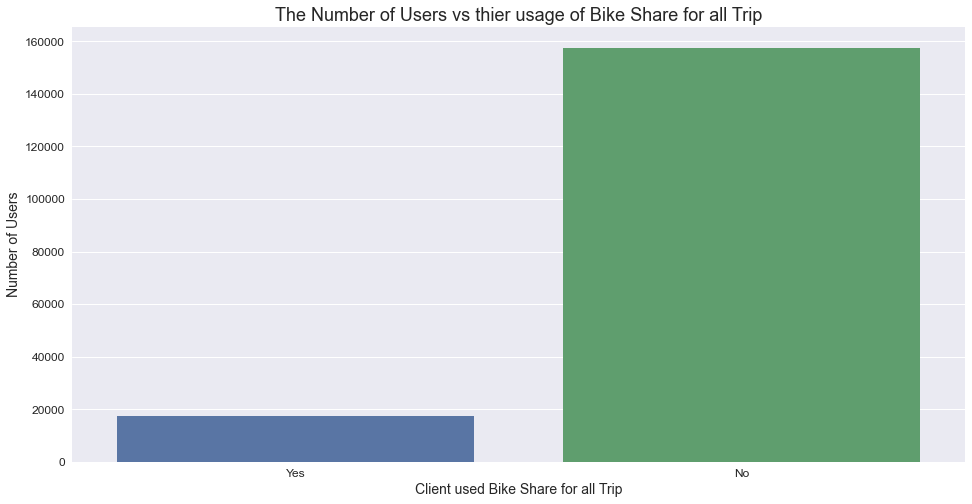

In [26]:
df.head()
plt.figure(figsize = [16, 8])
sb.countplot(data=df,x='bike_share_for_all_trip',order=['Yes','No']);
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Number of Users',fontsize=14);
plt.xlabel('Client used Bike Share for all Trip',fontsize=14);
plt.title("The Number of Users vs thier usage of Bike Share for all Trip",fontsize=18);

> From the graph we can clearly see that the number of users who chose not to use the bike share for all the trip is significantly higher than users how chose to use it.

### **Q7** what is the relation between the Gender of the user and their age?

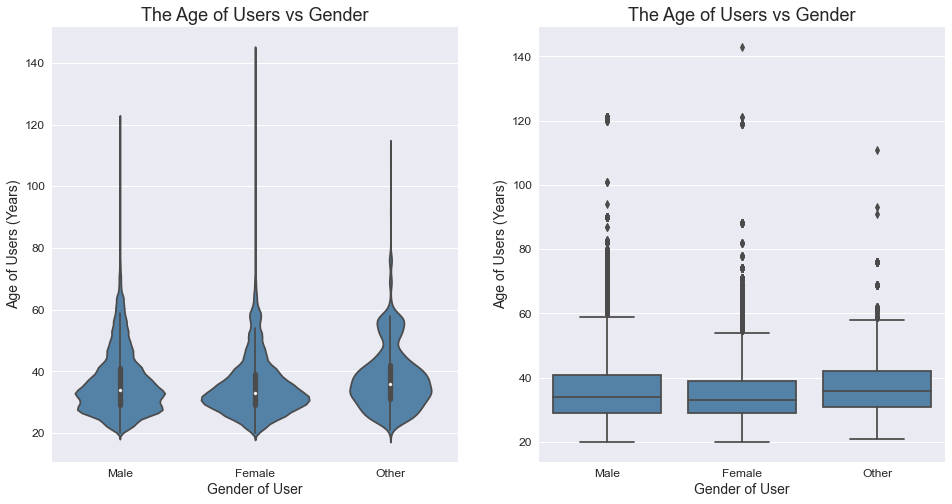

In [27]:
plt.figure(figsize = [16, 8])
plt.subplot(1,2,2)
sb.boxplot(data=df,x='member_gender',y='member_age',order=['Male','Female','Other'],color='steelblue');
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Age of Users (Years)',fontsize=14);
plt.xlabel('Gender of User',fontsize=14);
plt.title("The Age of Users vs Gender",fontsize=18);
plt.subplot(1,2,1)
sb.violinplot(data=df,x='member_gender',y='member_age',order=['Male','Female','Other'],color='steelblue');
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Age of Users (Years)',fontsize=14);
plt.xlabel('Gender of User',fontsize=14);
plt.title("The Age of Users vs Gender",fontsize=18);

> From both the violin and box plots we can clearly see that the mean is around the age of 35 for males and slightly lower for females while others have a slightly higher age mean. we can also observe outliers above the age of 60 ~ 65 which corresponds well with previous findings.

### **Q8** What are the top ten start and end stations?

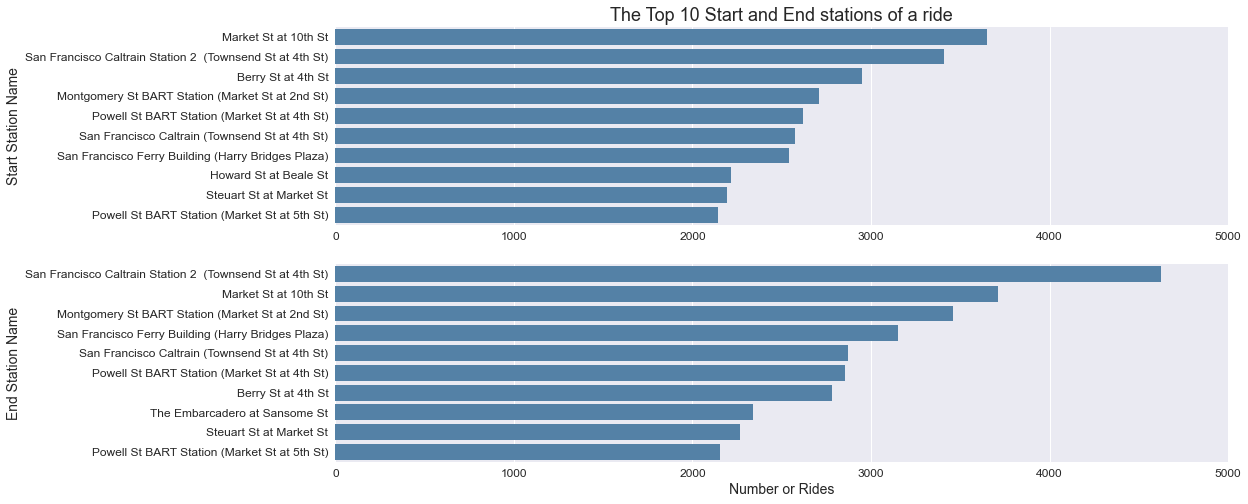

In [33]:
top_10_start = df.start_station_name.value_counts()[:10] #to find top 10 start stations
top_10_end = df.end_station_name.value_counts()[:10]     #to find top 10 end stations
plt.figure(figsize = [16, 8])
plt.subplot(2,1,1)
sb.barplot(data = df,x= top_10_start,y=top_10_start.index,color='steelblue');
plt.style.use('seaborn');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Start Station Name',fontsize=14);
plt.xlabel('',fontsize=14);
plt.xlim(0,5000);
plt.title("The Top 10 Start and End stations of a ride",fontsize=18);
plt.subplot(2,1,2)
sb.barplot(data = df,x= top_10_end,y=top_10_end.index,color='steelblue');
plt.style.use('seaborn');
plt.xlim(0,5000);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('End Station Name',fontsize=14);
plt.xlabel('Number or Rides',fontsize=14);

> From this graph we can see that the top 10 stations in the start and end of a trip have a lot in common (most stations are in both lists) this means that the general area between these stations contains the highest traffic and we should invest more in this area.

### **Q9** The Relation between gender, age and duration of trip.

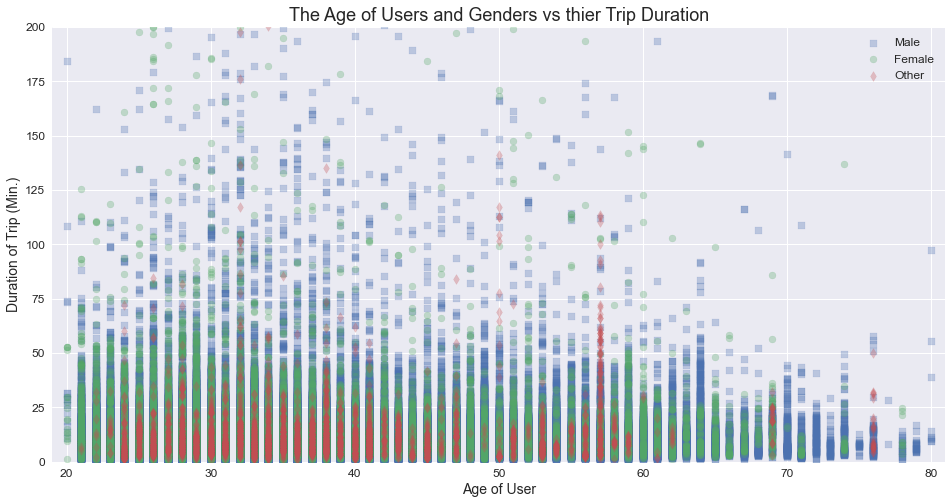

In [29]:
plt.figure(figsize = [16, 8])
cat_markers = [['Male', 's'],['Female', 'o'],['Other', 'd']]
for cat, marker in cat_markers:
    df_gender = df[df['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'member_age', y = 'duration_min', marker = marker,alpha=0.3);
plt.legend(['Male', 'Female', 'Other'],fontsize=12);
plt.style.use('seaborn');
plt.xlim(19,81);
plt.ylim(0,200);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Duration of Trip (Min.)',fontsize=14);
plt.xlabel('Age of User',fontsize=14);
plt.title("The Age of Users and Genders vs thier Trip Duration",fontsize=18);

>We can observe that the male and female users under the age of 30 usually have the same trip duration of about 50 minutes and stay almost consistant for all ages. However, we noted from a graph we explored before that the number of female users is quite smaller than that of male users which renforces the finding that marketing team should focus more on campaings targeted towards female users.

## Conclusions <a id='conc'></a>

> Males in general use the Ford GoBike service approximately 3 times as Females and orders of magnitudes more than Other, the marketing department should focus more on Females to increase their numbers.
> The average ride time is around 5 to 10 minutes which means that the majority of users approximately 65000 take 5 to 10 min trips while a smaller number of users (approx. 39000) take the bikes for 5 minutes and a simillar number take the bike for more than 10 minutes, and a minority of users take the bikes for more than an hour.
> Most of the users are between the age of 25 to 40 and decreasing after 40 till we reach a few users by the age of 80.
> The number of Subscribers surpass the number of Customers, and that Customers form about 1/8 from the users of the Ford GoBike service.
> Users of age 120 years and durations or rides that exceed 3 hours to better focus on the users and thier ride times i choose to view users from age 20 to 70 and time durations of 2 hours. it is also observed that the majority of users take bikes for the duration of around 15 minutes and users from ages of 20 to 40 use the bike for an extended period of about 30 minutes.
> The number of users who chose not to use the bike share for all the trip is significantly higher than users how chose to use it.
> The mean is around the age of 35 for males and slightly lower for females while others have a slightly higher age mean. we can also observe outliers above the age of 60 ~ 65 which corresponds well with previous findings.
> The top 10 stations in the start and end of a trip have a lot in common (most stations are in both lists) this means that the general area between these stations contains the highest traffic and we should invest more in this area.
>The male and female users under the age of 30 usually have the same trip duration of about 50 minutes and stay almost consistant for all ages. However, we noted from a graph we explored before that the number of female users is quite smaller than that of male users which renforces the finding that marketing team should focus more on campaings targeted towards female users.